# Home assignment 1: Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kalman_filter(x, E):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_s = []
    x_s = []

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        k_s.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        E = (I - (K @ H)) @ E
        x_s.append(x)

        print(f"x= \n{x}")
        print(f"E= \n{E}")

    return k_s, x_s

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [3]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.zeros((4,4))
E[2][2] = 1000
E[3][3] = 1000

# next state function: 4D
F = np.eye(4)
F[0][2] = dt
F[1][3] = dt

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.array([[1,0,0,0],[0,1,0,0]])

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.diag([0.1,0.1])

# 4D identity matrix
I = np.eye(4)

print('E=\n', E)
print('F=\n', F)
print('H=\n', H)
print('R=\n', R)
print('I=\n', I)

E=
 [[   0.    0.    0.    0.]
 [   0.    0.    0.    0.]
 [   0.    0. 1000.    0.]
 [   0.    0.    0. 1000.]]
F=
 [[1.  0.  0.1 0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]
H=
 [[1 0 0 0]
 [0 1 0 0]]
R=
 [[0.1 0. ]
 [0.  0.1]]
I=
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## First experiment

In [4]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [5]:
k_s, x_s = kalman_filter(x, E)

x= 
[[  4.99009901]
 [ 10.02079208]
 [  9.9009901 ]
 [-20.79207921]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[  5.99600798]
 [  8.00838323]
 [  9.98003992]
 [-20.95808383]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[  6.99785867]
 [  6.00449679]
 [  9.99286224]
 [-20.98501071]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[  7.99866711]
 [  4.00279907]
 [  9.99666778]
 [-20.99300233]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

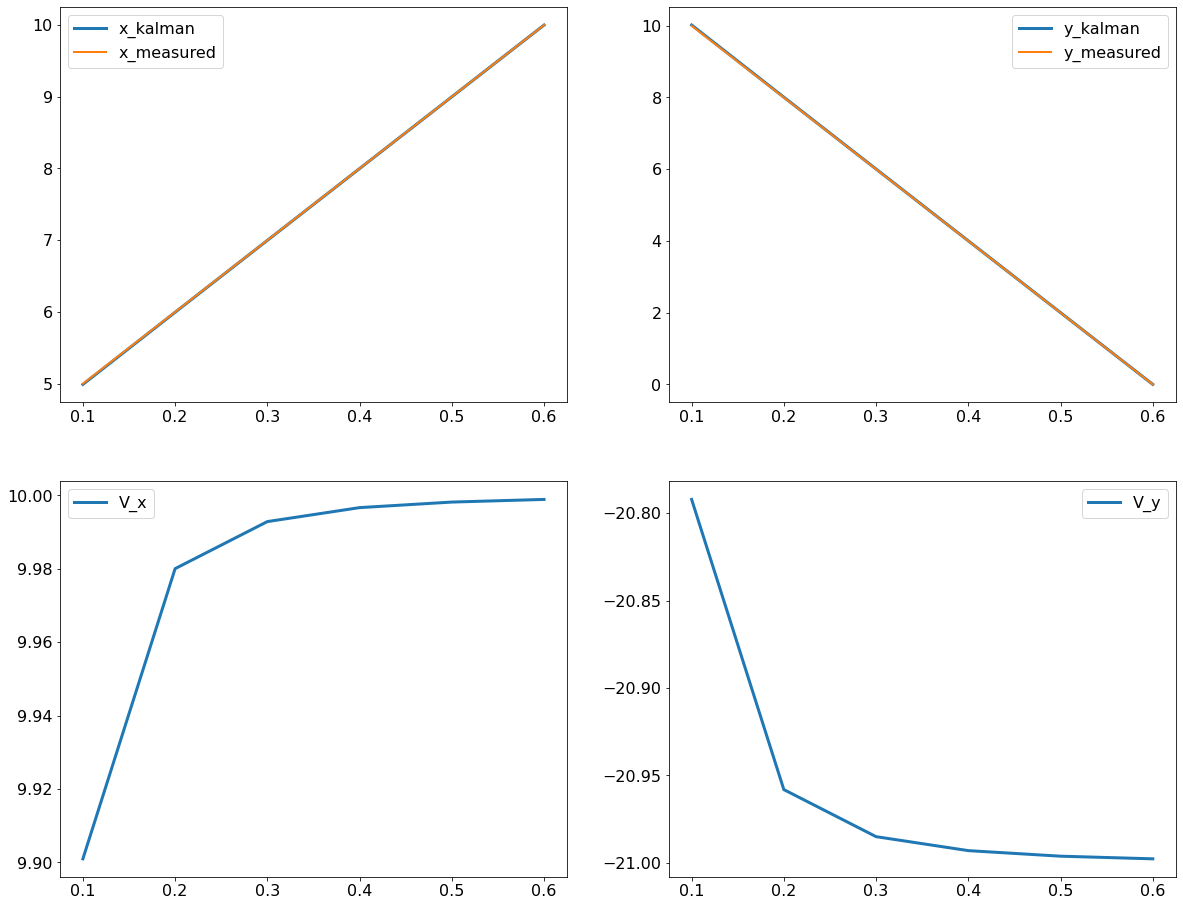

In [6]:
plt.rcParams.update({'font.size': 16})
# YOUR CODE HERE
def plot_graphics(dt,x_s, measurements):
    t = [dt * t for t in range(1,len(x_s) + 1)]
    fig, ax = plt.subplots(2,2,figsize=(20,16))
    ax[0,0].plot(t,[x[0] for x in x_s],label='x_kalman',linewidth=3)
    ax[0,0].plot(t,[x[0] for x in measurements],label='x_measured',linewidth=2)
    ax[0,0].legend()
    ax[0,1].plot(t,[x[1] for x in x_s],label='y_kalman',linewidth=3)
    ax[0,1].plot(t,[x[1] for x in measurements],label='y_measured',linewidth=2)
    ax[0,1].legend()
    ax[1,0].plot(t,[x[2] for x in x_s],label='V_x',linewidth=3)
    ax[1,0].legend()
    ax[1,1].plot(t,[x[3] for x in x_s],label='V_y',linewidth=3)
    ax[1,1].legend()
    
    
plot_graphics(dt,x_s,measurements)

Visualize the components of the $ K $ matrix below

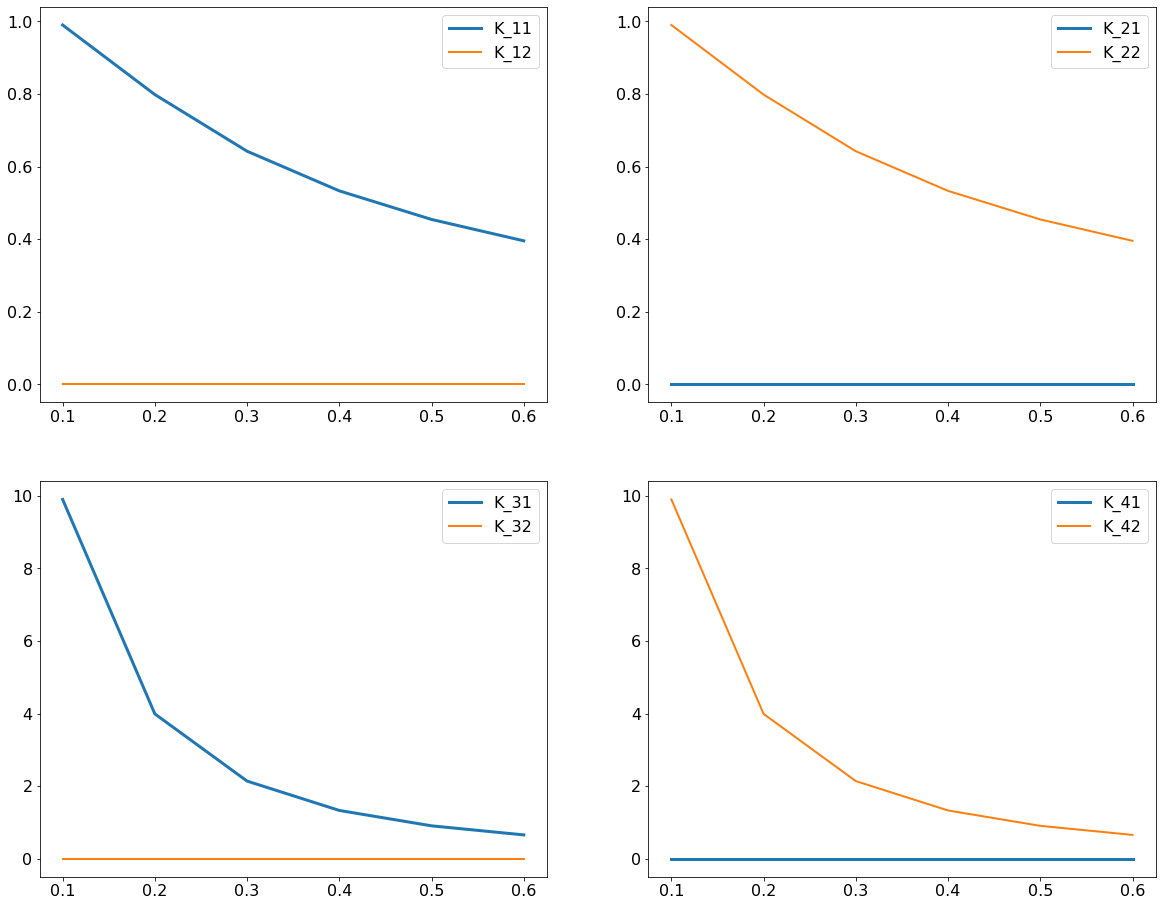

In [7]:
def plot_graphics_for_K(dt,k_s):
    t = [dt * t for t in range(1,len(k_s) + 1)]
    fig, ax = plt.subplots(2,2,figsize=(20,16))
    ax[0,0].plot(t,[k[0][0] for k in k_s],label='K_11',linewidth=3)
    ax[0,0].plot(t,[k[0][1] for k in k_s],label='K_12',linewidth=2)
    ax[0,0].legend()
    ax[0,1].plot(t,[k[1][0] for k in k_s],label='K_21',linewidth=3)
    ax[0,1].plot(t,[k[1][1] for k in k_s],label='K_22',linewidth=2)
    ax[0,1].legend()
    ax[1,0].plot(t,[k[2][0] for k in k_s],label='K_31',linewidth=3)
    ax[1,0].plot(t,[k[2][1] for k in k_s],label='K_32',linewidth=2)
    ax[1,0].legend()
    ax[1,1].plot(t,[k[3][0] for k in k_s],label='K_41',linewidth=3)
    ax[1,1].plot(t,[k[3][1] for k in k_s],label='K_42',linewidth=2)
    ax[1,1].legend()
    
plot_graphics_for_K(dt,k_s)

## Second experiment

In [8]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [9]:
k_s_2, x_s_2 = kalman_filter(x, E)

x= 
[[  0.95049505]
 [  4.04059406]
 [ 49.5049505 ]
 [-40.59405941]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[ 5.98003992e+00]
 [ 1.63672655e-02]
 [ 4.99001996e+01]
 [-4.09181637e+01]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[ 10.98929336]
 [ -3.99122056]
 [ 49.96431121]
 [-40.97073519]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[ 15.99333555]
 [ -7.99453515]
 [ 49.98333889]
 [-40.98633789]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

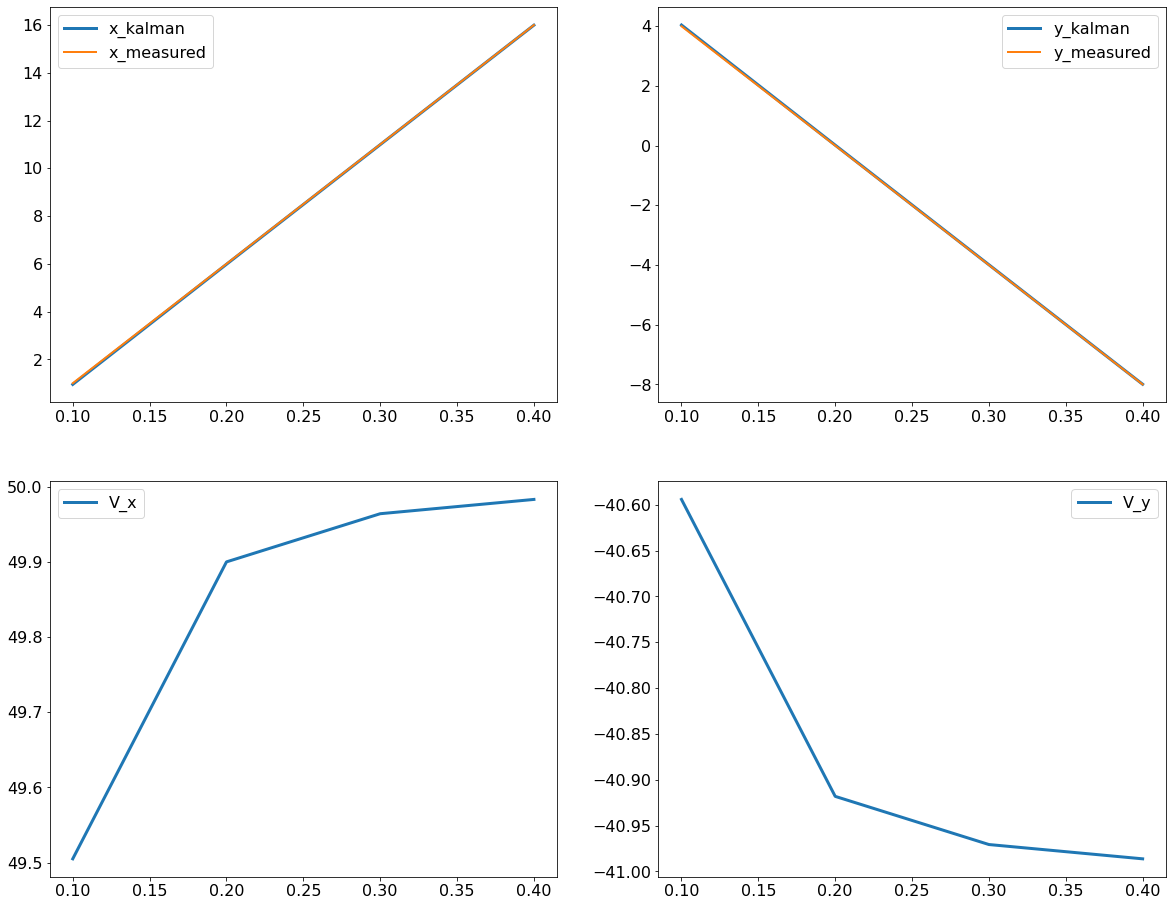

In [10]:
# YOUR CODE HERE
plot_graphics(dt,x_s_2,measurements)

Visualize the components of the $ K $ matrix below

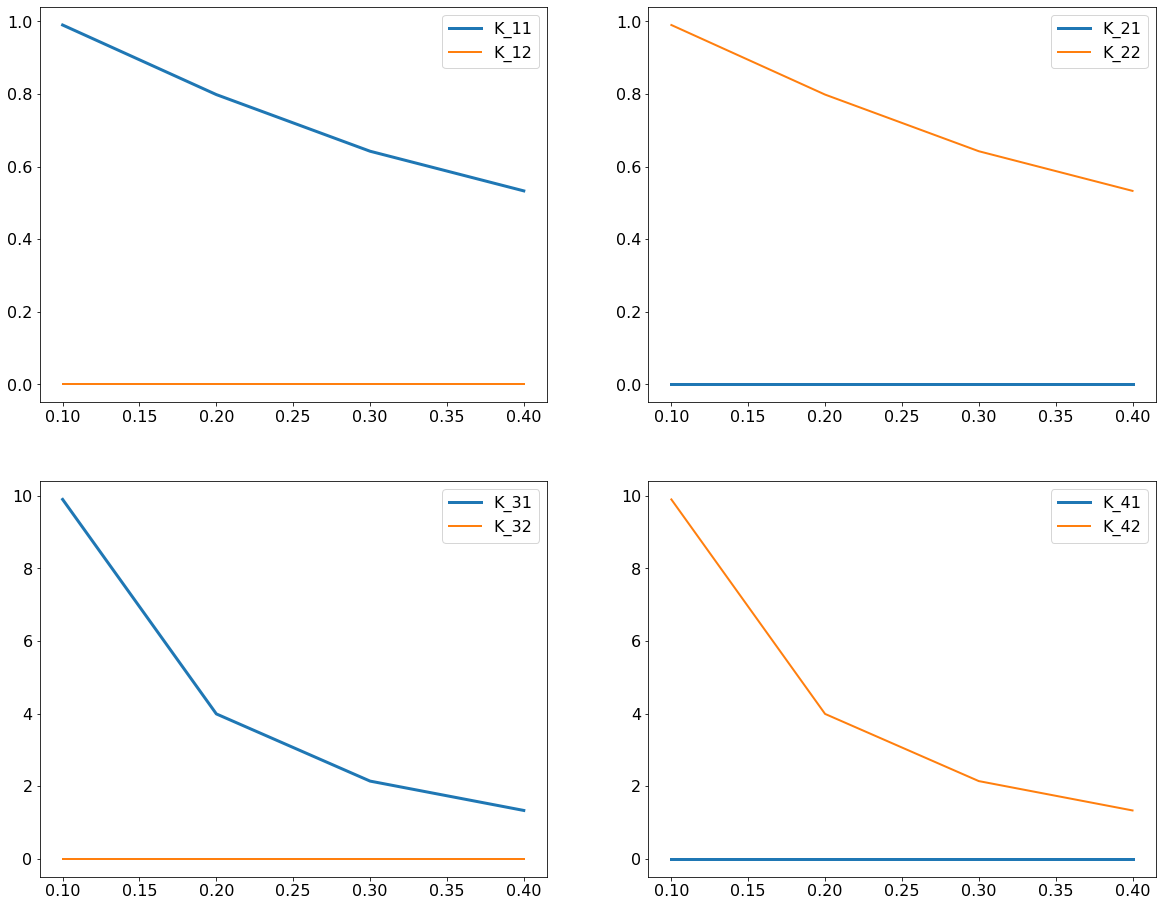

In [11]:
plot_graphics_for_K(dt,k_s_2)

## Third Experiment

In [12]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [13]:
k_s_3, x_s_3 = kalman_filter(x, E)

x= 
[[  1.        ]
 [ 17.02079208]
 [  0.        ]
 [-20.79207921]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[  1.        ]
 [ 15.00838323]
 [  0.        ]
 [-20.95808383]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[  1.        ]
 [ 13.00449679]
 [  0.        ]
 [-20.98501071]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[  1.        ]
 [ 11.00279907]
 [  0.        ]
 [-20.99300233]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

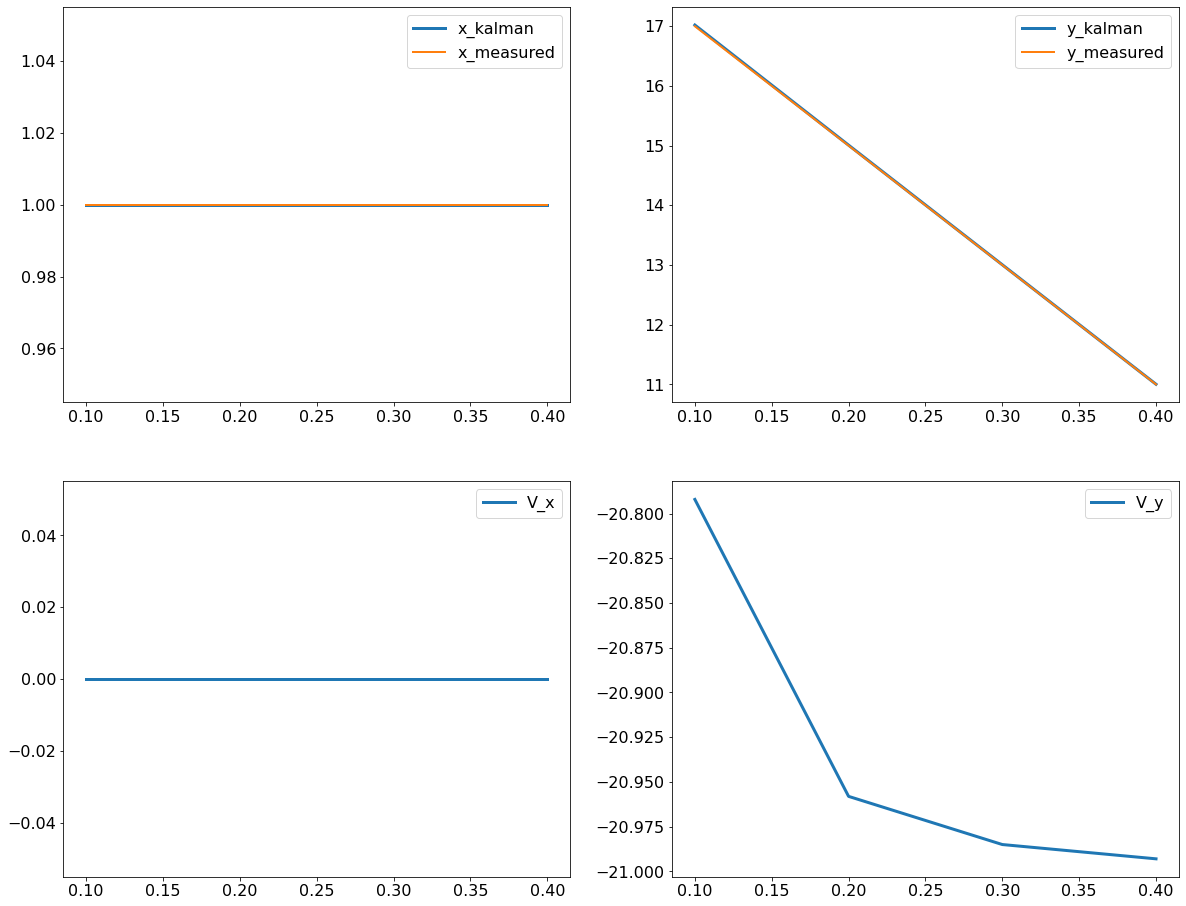

In [14]:
plot_graphics(dt,x_s_3,measurements)

Visualize the components of the $ K $ matrix below

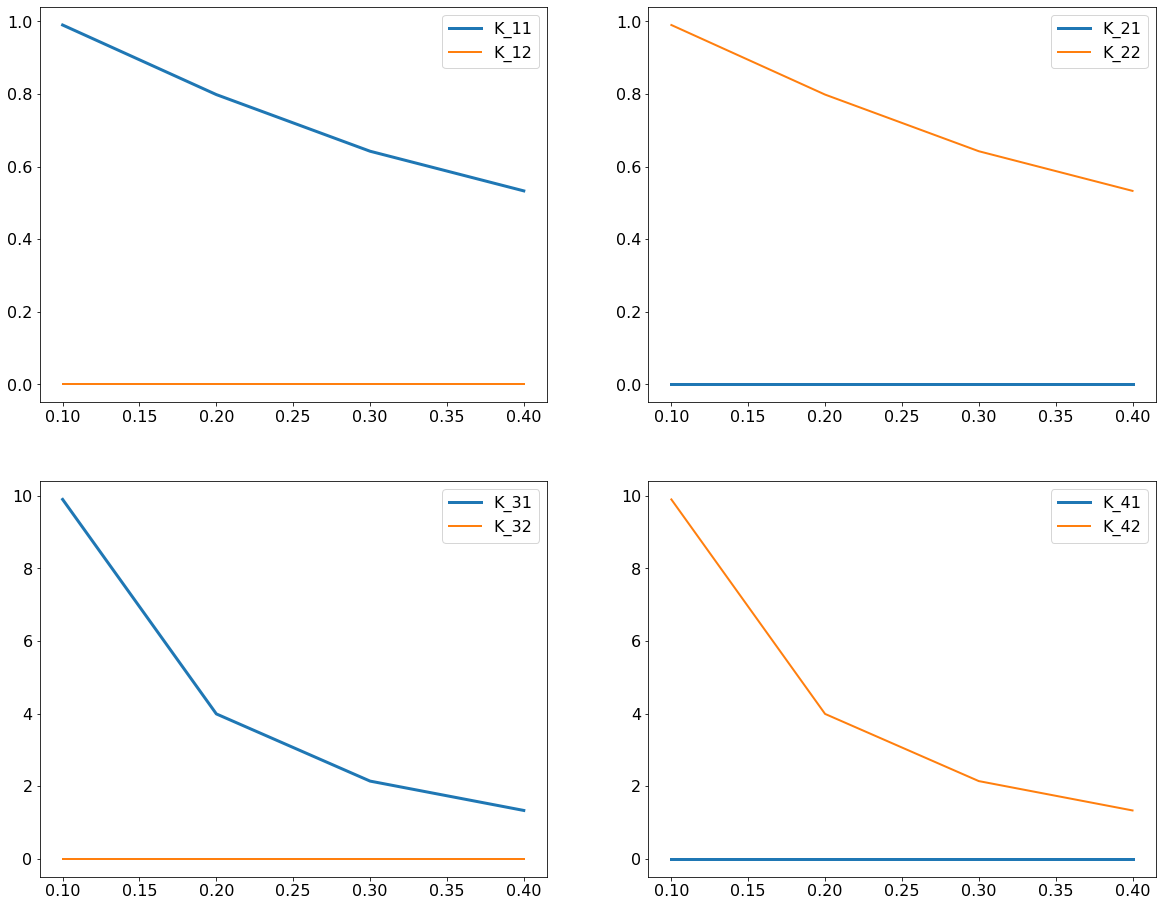

In [15]:
plot_graphics_for_K(dt,k_s_3)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

В первом и втором эксперименте робот двигается из верхней левой точки в правую нижнюю, поэтому на графике изменения координат мы видим линейное увеличение координаты $x$ и линейное уменьшение координаты $y$.   В третьем эксперименте робот движется вертикально вниз, поэтому координата $x$ не меняется и компонента скорости $V_x=0$ , а координата $y$ уменьшается. Во всех трех случаях наблюдается итерационное приближение скорости к оцениваемому значению, что соответсвует картине равномерного движения в результате однократного внешнего воздействия на робота.

На всех графиках изменения компонент матрицы $K$ от времени мы видим, что одна из компонент матрицы нулевая, т.к. $x$ и $V_x$ не зависят от $y$, а $y$ и $V_y$ - от $x$. Матрица $K$ является матрицей коэффициентов усиления Калмана, и ее компоненты уменьшатся, если показания (измерения) соответствуют прогнозируемому состоянию системы. Если измеренные значения говорят об обратном, элементы матрицы K становятся больше. В нашем случае нет матрицы $Q$ и на каждом шаге мы более уверены в предсказанном состоянии системы, на графиках видно, что ненулевые компонтеты матрицы уменьшаются.